<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%207%20-%20Machine%20Learning/Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

יצירת הנתונים

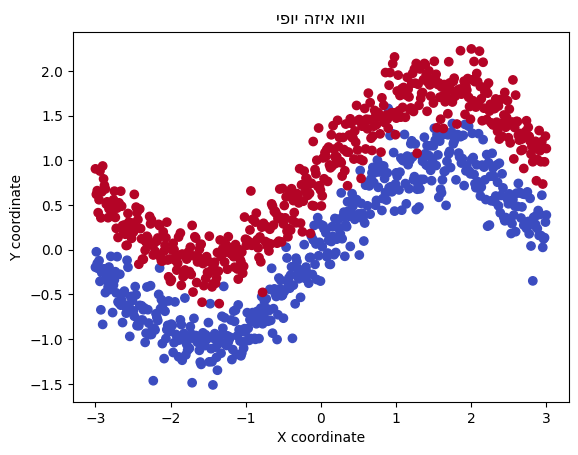

In [2]:
# מספר הדוגמאו
n_samples = 500

# קואורדינטת X (בין -3 ל-3)
x = np.linspace(-3, 3, n_samples)

# יוצרים שני גלים מופרדים
y1 = np.sin(x) + np.random.normal(scale=0.2, size=n_samples)  # גל ראשון
y2 = np.sin(x) + np.random.normal(scale=0.2, size=n_samples) + 0.85 # גל שני, מוזז למעלה

# מחברים הכל למטריצה של תכונות (X) ותיוגים (y)
X = np.column_stack((np.concatenate([x, x]), np.concatenate([y1, y2])))
y = np.array([0] * n_samples + [1] * n_samples)  # תיוגים לפי הגל

# הבה נראה מה יצא
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("יפוי הזיא ואוו")
plt.show()

In [3]:
# מחלקים ל-Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# בניית המודל
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = None)
])

In [5]:
# קומפילציה של המודל
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy', tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()]
)

In [6]:
# אימון המודל
history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6797 - loss: 0.5617 - precision: 0.8752 - recall: 0.3987 - val_accuracy: 0.8700 - val_loss: 0.3844 - val_precision: 0.9643 - val_recall: 0.7788
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8485 - loss: 0.3745 - precision: 0.8684 - recall: 0.8168 - val_accuracy: 0.8450 - val_loss: 0.3066 - val_precision: 0.9195 - val_recall: 0.7692
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8677 - loss: 0.3186 - precision: 0.8968 - recall: 0.8389 - val_accuracy: 0.9300 - val_loss: 0.2130 - val_precision: 0.9891 - val_recall: 0.8750
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9041 - loss: 0.2333 - precision: 0.9538 - recall: 0.8574 - val_accuracy: 0.8700 - val_loss: 0.2571 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9113 - loss: 0.2129 - precision: 0.9572 - recall: 0.8644 - val_accuracy: 0.9700 - val_loss: 0.1087 - va

In [7]:
#plot history
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

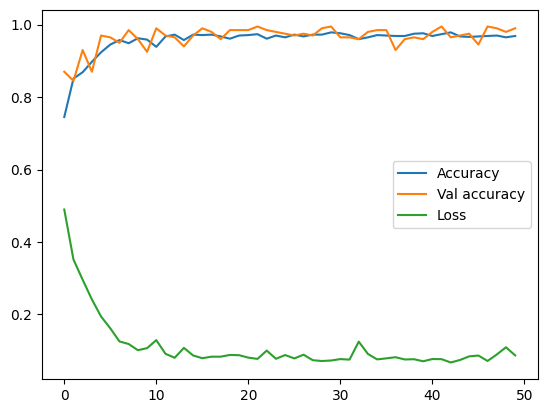

In [8]:
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val accuracy")
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

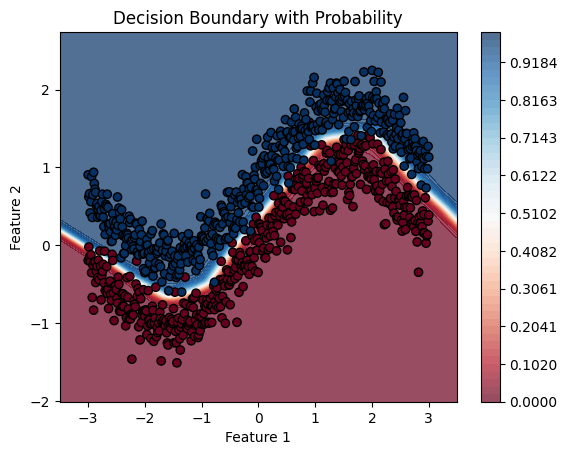

In [9]:
%run PlotBoudary.ipynb

tf_plot_boundary(X,y,model)